<a href="https://colab.research.google.com/github/ormorteey/STA-250-Project/blob/main/STA_250_%5BR%5D_Computational_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
install.packages("pacman")
library(pacman)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#@title

p_load(tidyverse, googledrive, gridExtra, cluster, factoextra, dendextend, gplots, plotly)


In [37]:
#@title
system("git clone https://github.com/romanchereshnev/HuGaDB.git")




<img src="https://raw.githubusercontent.com/romanchereshnev/HuGaDB/master/images/Location-of-Sensors.png" alt="Drawing" height = 250/>

In [3]:
#@title
drive_deauth()
drive_user()
public_file = drive_get(as_id("16Z4NYVo85-BcziIoBwgOCnHvUQ59F3Fo"))
drive_download(public_file, overwrite = T)

ℹ Not logged in as any specific Google user.

File downloaded:

• HuGaDB.zip <id: 16Z4NYVo85-BcziIoBwgOCnHvUQ59F3Fo>

Saved locally as:

• HuGaDB.zip



In [4]:
#@title
unzip("HuGaDB.zip")

In [5]:
#@title
rm(list = ls())

In [6]:
#@title
ts_df_0 = read.table("Data/HuGaDB_v1_walking_01_00.txt", header = T)
head(ts_df_0, 6)
print(dim(ts_df_0))

,acc_rf_x,acc_rf_y,acc_rf_z,gyro_rf_x,gyro_rf_y,gyro_rf_z,acc_rs_x,acc_rs_y,acc_rs_z,gyro_rs_x,⋯,gyro_ls_z,acc_lt_x,acc_lt_y,acc_lt_z,gyro_lt_x,gyro_lt_y,gyro_lt_z,EMG_r,EMG_l,act
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,-32768,-780,23984,-2983,10095,4931,-32768,-6992,-1720,-4407,⋯,-156,-10128,-8032,-14928,2160,1270,-149,121,149,1
2,-32768,-32768,32767,-3077,8437,5303,-32768,-23248,1592,-2819,⋯,507,-944,11744,-18960,1454,1545,-334,143,118,1
3,-4104,-32768,32767,670,3768,5494,-19016,-20920,-32160,1657,⋯,318,-22584,12088,-17712,553,2108,574,126,105,1
4,-23628,-32768,32767,604,-4726,-1661,-14440,1560,-1600,1111,⋯,424,-19728,8136,-11976,-74,2164,972,82,105,1
5,20224,-18044,17236,1553,-5154,-2546,-17688,-7960,1968,828,⋯,-211,-19776,4528,-9304,-840,2454,-200,97,96,1
6,15436,-8612,14164,307,-4501,-2836,-10224,-328,-3104,2145,⋯,-133,-18240,-1696,-6288,-805,2476,-192,116,90,1


[1] 5989   39


In [7]:
#@title
ts_df_1 = read.table("Data/HuGaDB_v1_walking_18_01.txt", header = T)
print(dim(ts_df_1))
ts_df_2 = read.table("Data/HuGaDB_v1_walking_18_02.txt", header = T)
print(dim(ts_df_2))
ts_df_3 = read.table("Data/HuGaDB_v1_walking_18_03.txt", header = T)
print(dim(ts_df_3))


[1] 2135   39
[1] 1900   39
[1] 5106   39


In [8]:
#@title
#setting the rep to use
ts_df = ts_df_2

## **Plots for gait dynamic time series**

In [9]:
#@title
# setting figure size

fig <- function(width = 12, heigth = 6.75){
     options(repr.plot.width = width, repr.plot.height = heigth)
}


In [10]:
#@title
gait_dynamic_ts_foot_plot_fn = function(mydata, start = 1, end = 500){
color_XYZ = c("X" = "red", "Y" = "green", "Z" = "blue")

# choose a chunk of the time series data
sampledata = mydata[start:end,] 

# plot the right foot accelerator data
p_acc_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_rf_x, color = "X")) +
  geom_line(aes(y = acc_rf_y, color = "Y")) +
  geom_line(aes(y = acc_rf_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "Right Foot Accelerator") +
  theme_bw()

# plot the right foot gyroscope data
p_gyro_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_rf_x, color = "X")) +
  geom_line(aes(y = gyro_rf_y, color = "Y")) +
  geom_line(aes(y = gyro_rf_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "Right Foot  Gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

# plot the left foot accelerator data
p_acc_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_lf_x, color = "X")) +
  geom_line(aes(y = acc_lf_y, color = "Y")) +
  geom_line(aes(y = acc_lf_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "Left Foot Accelerator") +
  theme_bw()

# plot the left foot gyroscope data
p_gyro_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_lf_x, color = "X")) +
  geom_line(aes(y = gyro_lf_y, color = "Y")) +
  geom_line(aes(y = gyro_lf_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "Left Foot Gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

grid.arrange(p_acc_rf, p_gyro_rf, p_acc_lf, p_gyro_lf, ncol = 1)
}



In [11]:
#@title
gait_dynamic_ts_shin_plot_fn = function(mydata, start = 1, end = 500){
color_XYZ = c("X" = "red", "Y" = "green", "Z" = "blue")

# choose a chunk of the time series data
sampledata = mydata[start:end,] 

# plot the right chin accelerator data
p_acc_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_rs_x, color = "X")) +
  geom_line(aes(y = acc_rs_y, color = "Y")) +
  geom_line(aes(y = acc_rs_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "Right Shin Accelerator") +
  theme_bw()

# plot the right shin gyroscope data
p_gyro_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_rs_x, color = "X")) +
  geom_line(aes(y = gyro_rs_y, color = "Y")) +
  geom_line(aes(y = gyro_rs_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "Right Shin  Gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

# plot the left shin accelerator data
p_acc_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_lf_x, color = "X")) +
  geom_line(aes(y = acc_lf_y, color = "Y")) +
  geom_line(aes(y = acc_lf_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "Left Shin Accelerator") +
  theme_bw()

# plot the left shin gyroscope data
p_gyro_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_ls_x, color = "X")) +
  geom_line(aes(y = gyro_ls_y, color = "Y")) +
  geom_line(aes(y = gyro_ls_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "Left Shin Gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

grid.arrange(p_acc_rf, p_gyro_rf, p_acc_lf, p_gyro_lf, ncol = 1)
}



In [12]:
#@title
gait_dynamic_ts_thigh_plot_fn = function(mydata, start = 1, end = 500){
color_XYZ = c("X" = "red", "Y" = "green", "Z" = "blue")

# choose a chunk of the time series data

sampledata = mydata[start:end,] 

# plot the right thigh accelerator data
p_acc_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_rt_x, color = "X")) +
  geom_line(aes(y = acc_rt_y, color = "Y")) +
  geom_line(aes(y = acc_rt_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "Right Thigh Accelerator") +
  theme_bw()

# plot the right thigh gyroscope data
p_gyro_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_rt_x, color = "X")) +
  geom_line(aes(y = gyro_rt_y, color = "Y")) +
  geom_line(aes(y = gyro_rt_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "Right Thigh  Gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

# plot the left Thigh accelerator data
p_acc_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_lt_x, color = "X")) +
  geom_line(aes(y = acc_lt_y, color = "Y")) +
  geom_line(aes(y = acc_lt_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "Left Thigh Accelerator") +
  theme_bw()

# plot the left thigh gyroscope data
p_gyro_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_lt_x, color = "X")) +
  geom_line(aes(y = gyro_lt_y, color = "Y")) +
  geom_line(aes(y = gyro_lt_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "Left Thigh Gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

grid.arrange(p_acc_rf, p_gyro_rf, p_acc_lf, p_gyro_lf, ncol = 1)
}



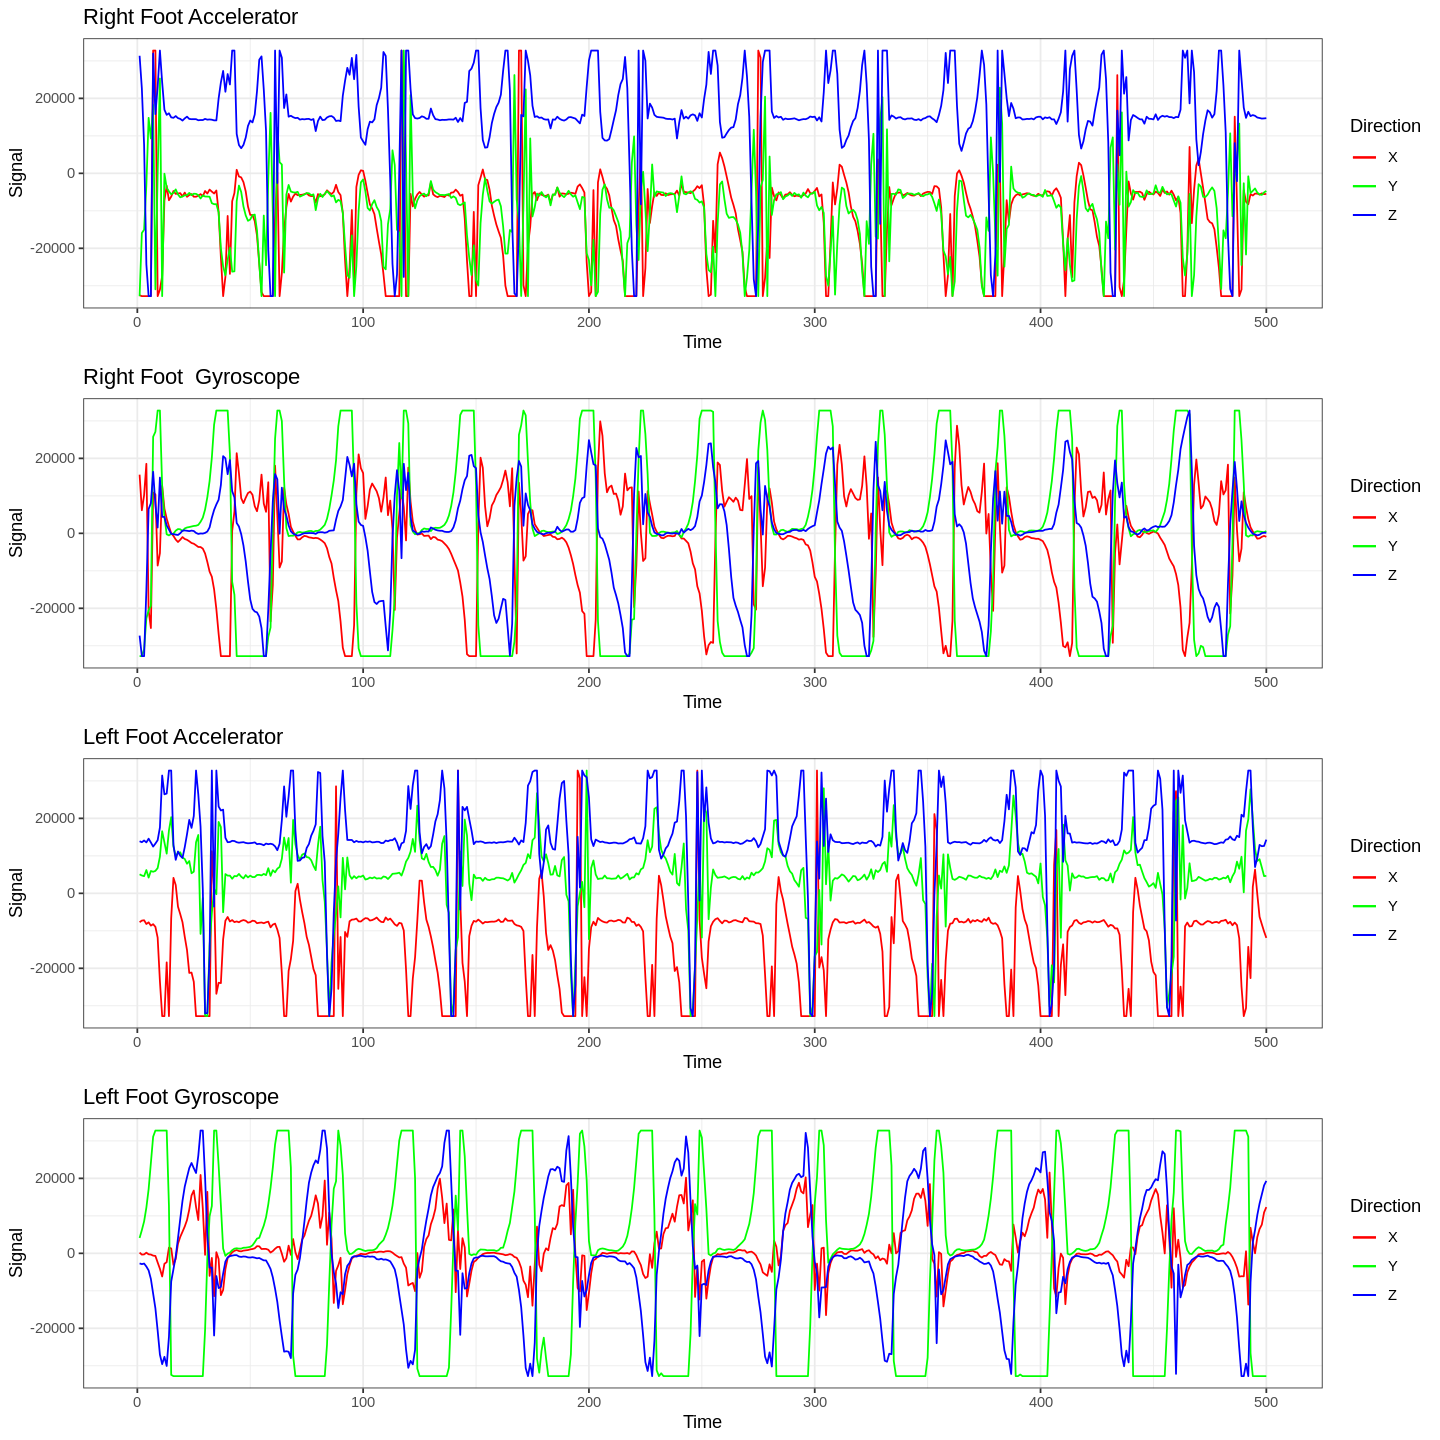

In [13]:
#@title
fig(width = 12, heigth = 12)
gait_dynamic_ts_foot_plot_fn(ts_df)



<img src="https://raw.githubusercontent.com/romanchereshnev/HuGaDB/master/images/Location-of-Sensors.png" alt="Drawing" height = 250/>

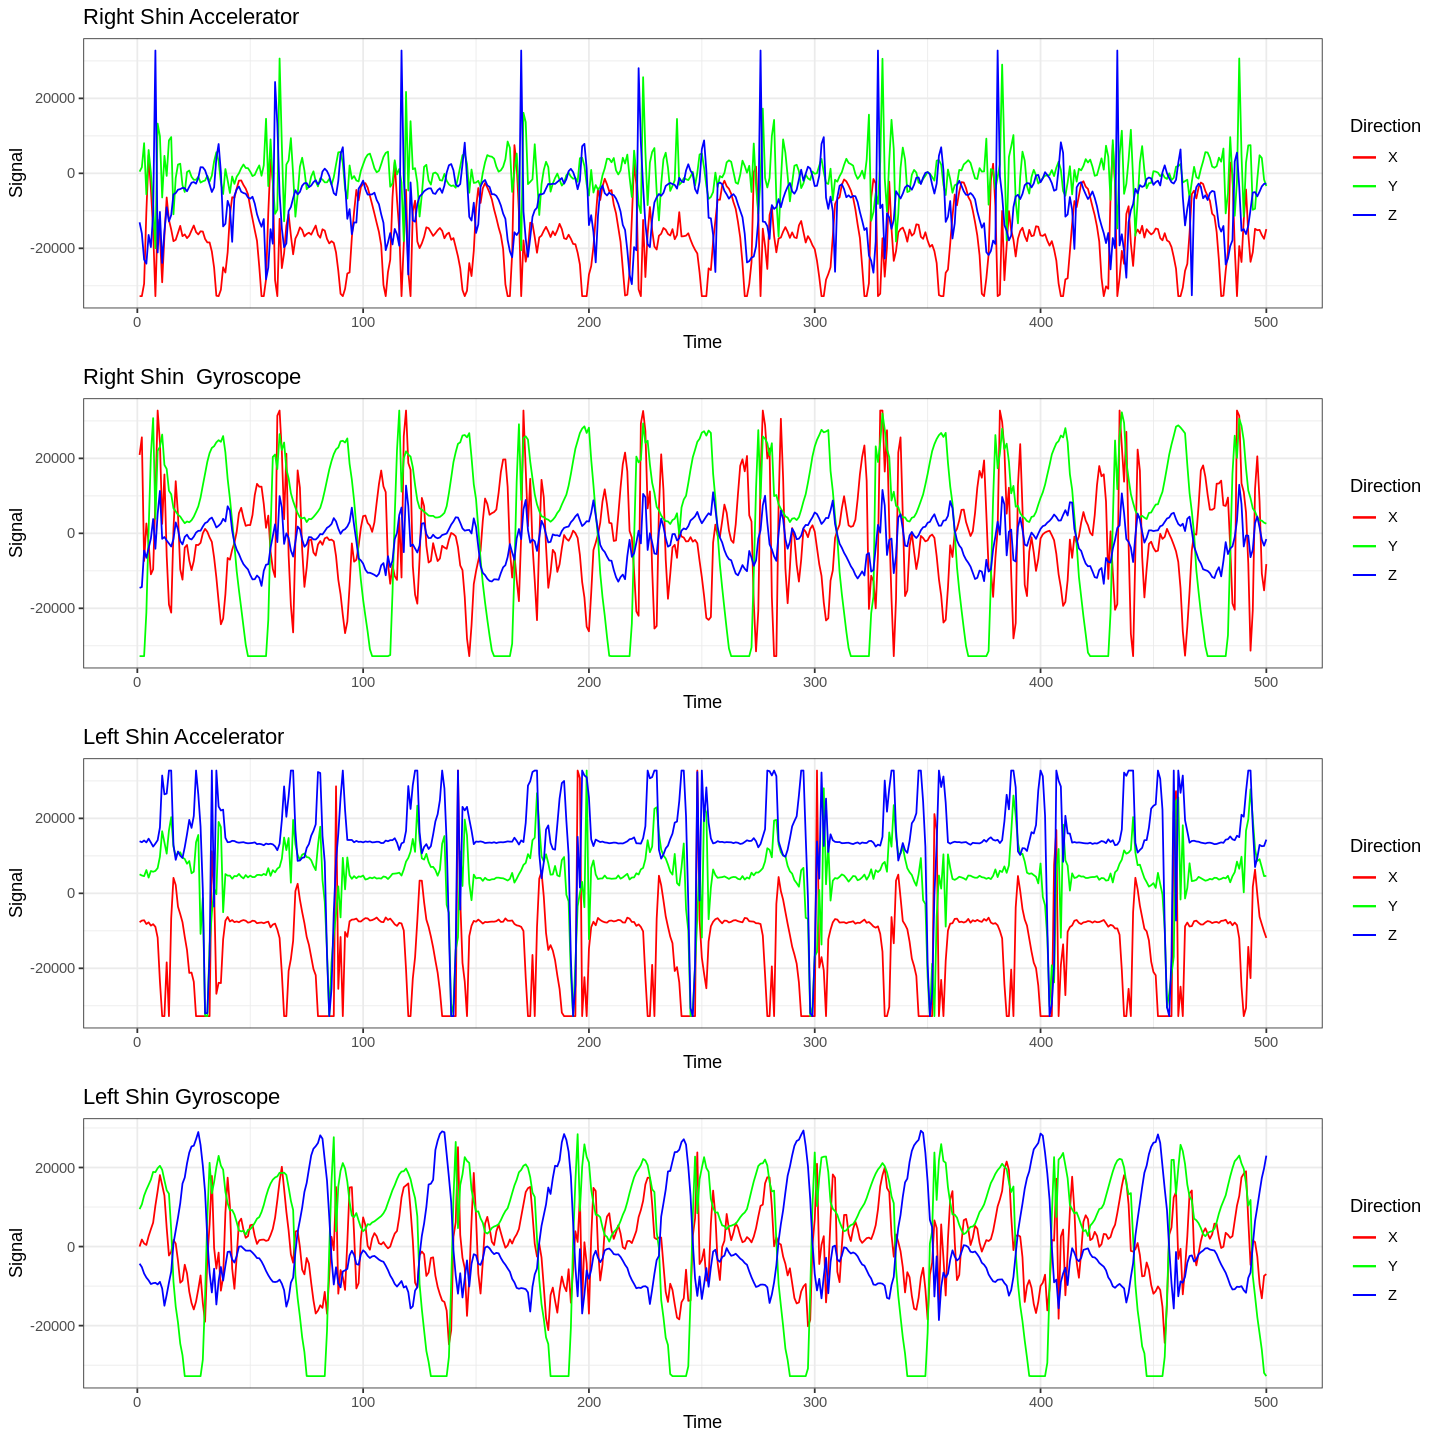

In [14]:
#@title
fig(width = 12, heigth = 12)
gait_dynamic_ts_shin_plot_fn(ts_df)



<img src="https://raw.githubusercontent.com/romanchereshnev/HuGaDB/master/images/Location-of-Sensors.png" alt="Drawing" height = 250/>

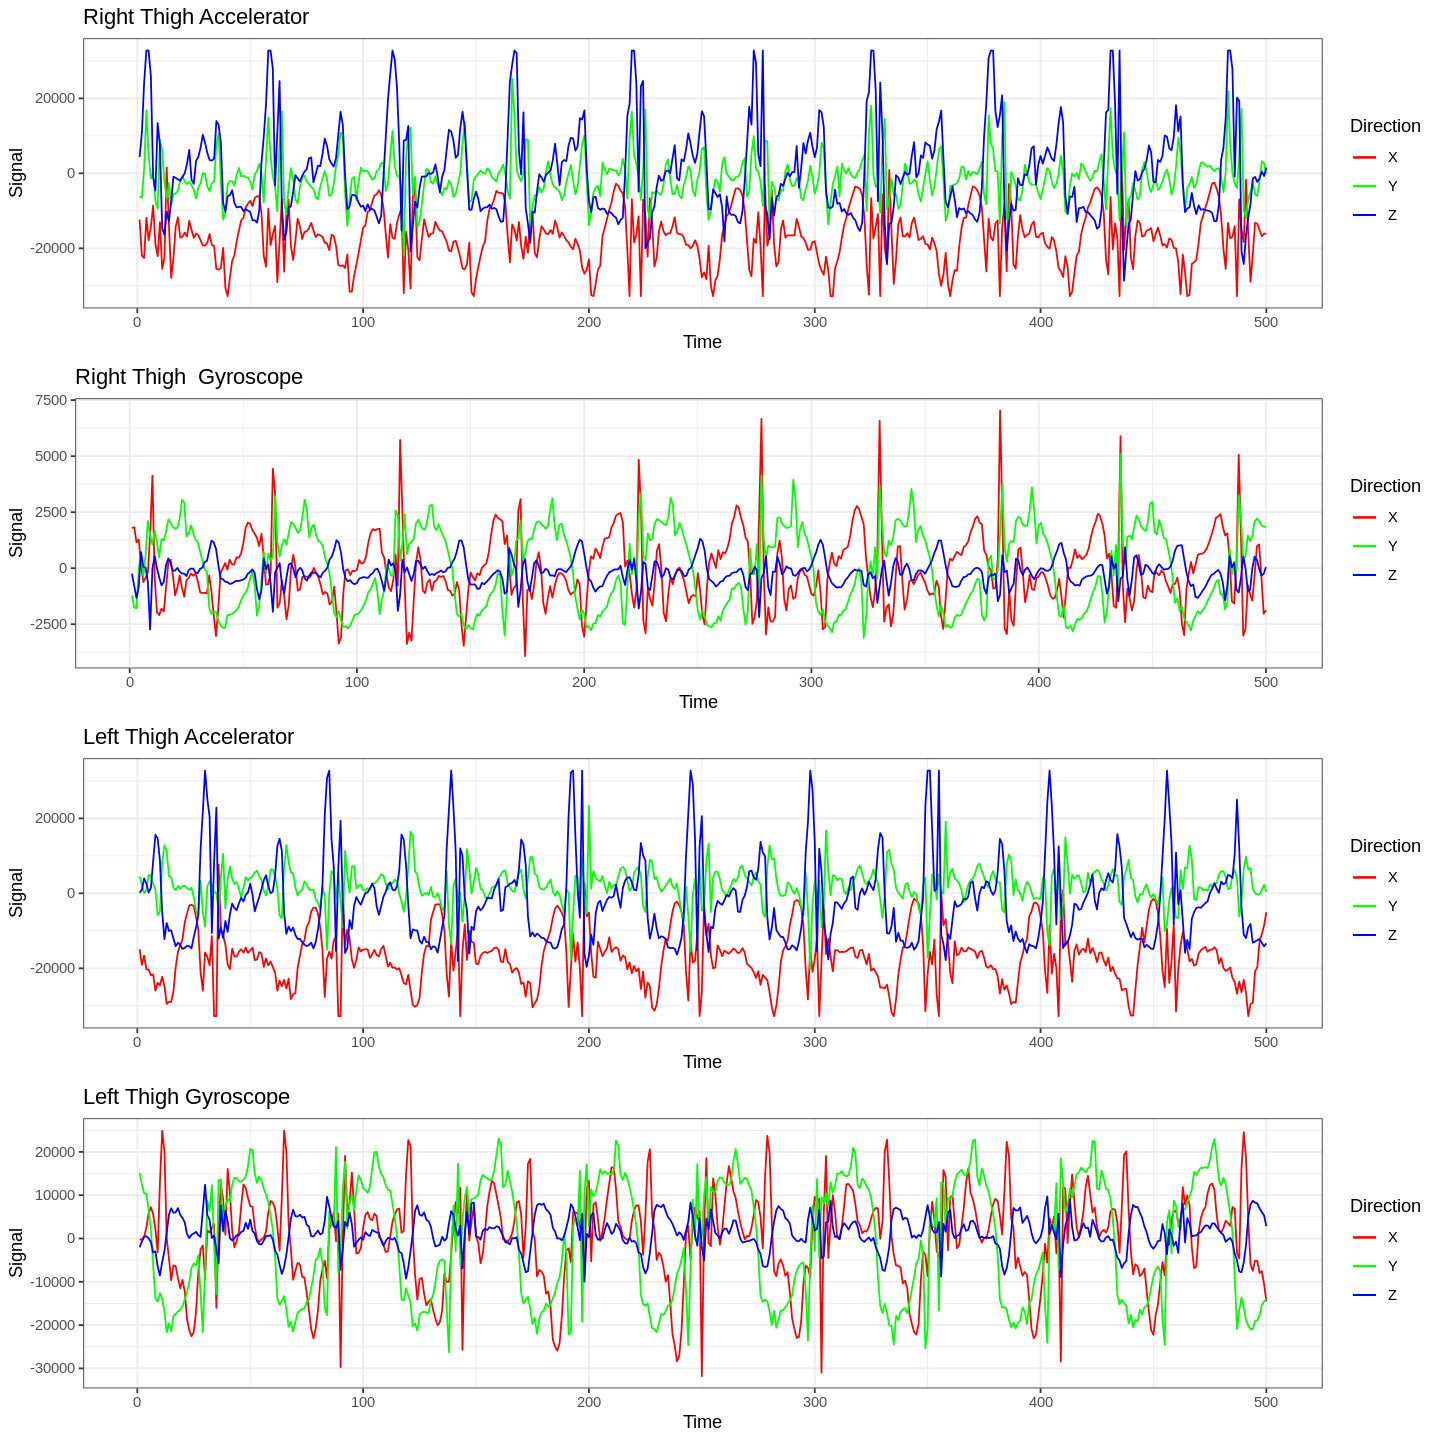

In [15]:
#@title
fig(width = 12, heigth = 12)
gait_dynamic_ts_thigh_plot_fn(ts_df)

## **Hierarchical clustering**

In [16]:
#@title
hierachical_clustering_fn = function(mydata, col_name,  row_start = 1, row_end = 500, plot_now = FALSE, clust_method = "ward.D2"){

sampledata = mydata[row_start:row_end, col_name] 

hc_sample_data = hclust(dist(sampledata), clust_method)

if (plot_now == TRUE){
  plot(hc_sample_data, xlab = "Clusters")
  plot(hc_sample_data, xlab = "Clusters")
  rect.hclust(hc_sample_data, k = 3, border = 2:4)
}


return(hc_sample_data)

}

In [17]:
#@title
col_names = colnames(ts_df)
col_names

[1] "acc_rf_x"  "acc_rf_y"  "acc_rf_z"  "gyro_rf_x" "gyro_rf_y" "gyro_rf_z"
 [7] "acc_rs_x"  "acc_rs_y"  "acc_rs_z"  "gyro_rs_x" "gyro_rs_y" "gyro_rs_z"
[13] "acc_rt_x"  "acc_rt_y"  "acc_rt_z"  "gyro_rt_x" "gyro_rt_y" "gyro_rt_z"
[19] "acc_lf_x"  "acc_lf_y"  "acc_lf_z"  "gyro_lf_x" "gyro_lf_y" "gyro_lf_z"
[25] "acc_ls_x"  "acc_ls_y"  "acc_ls_z"  "gyro_ls_x" "gyro_ls_y" "gyro_ls_z"
[31] "acc_lt_x"  "acc_lt_y"  "acc_lt_z"  "gyro_lt_x" "gyro_lt_y" "gyro_lt_z"
[37] "EMG_r"     "EMG_l"     "act"

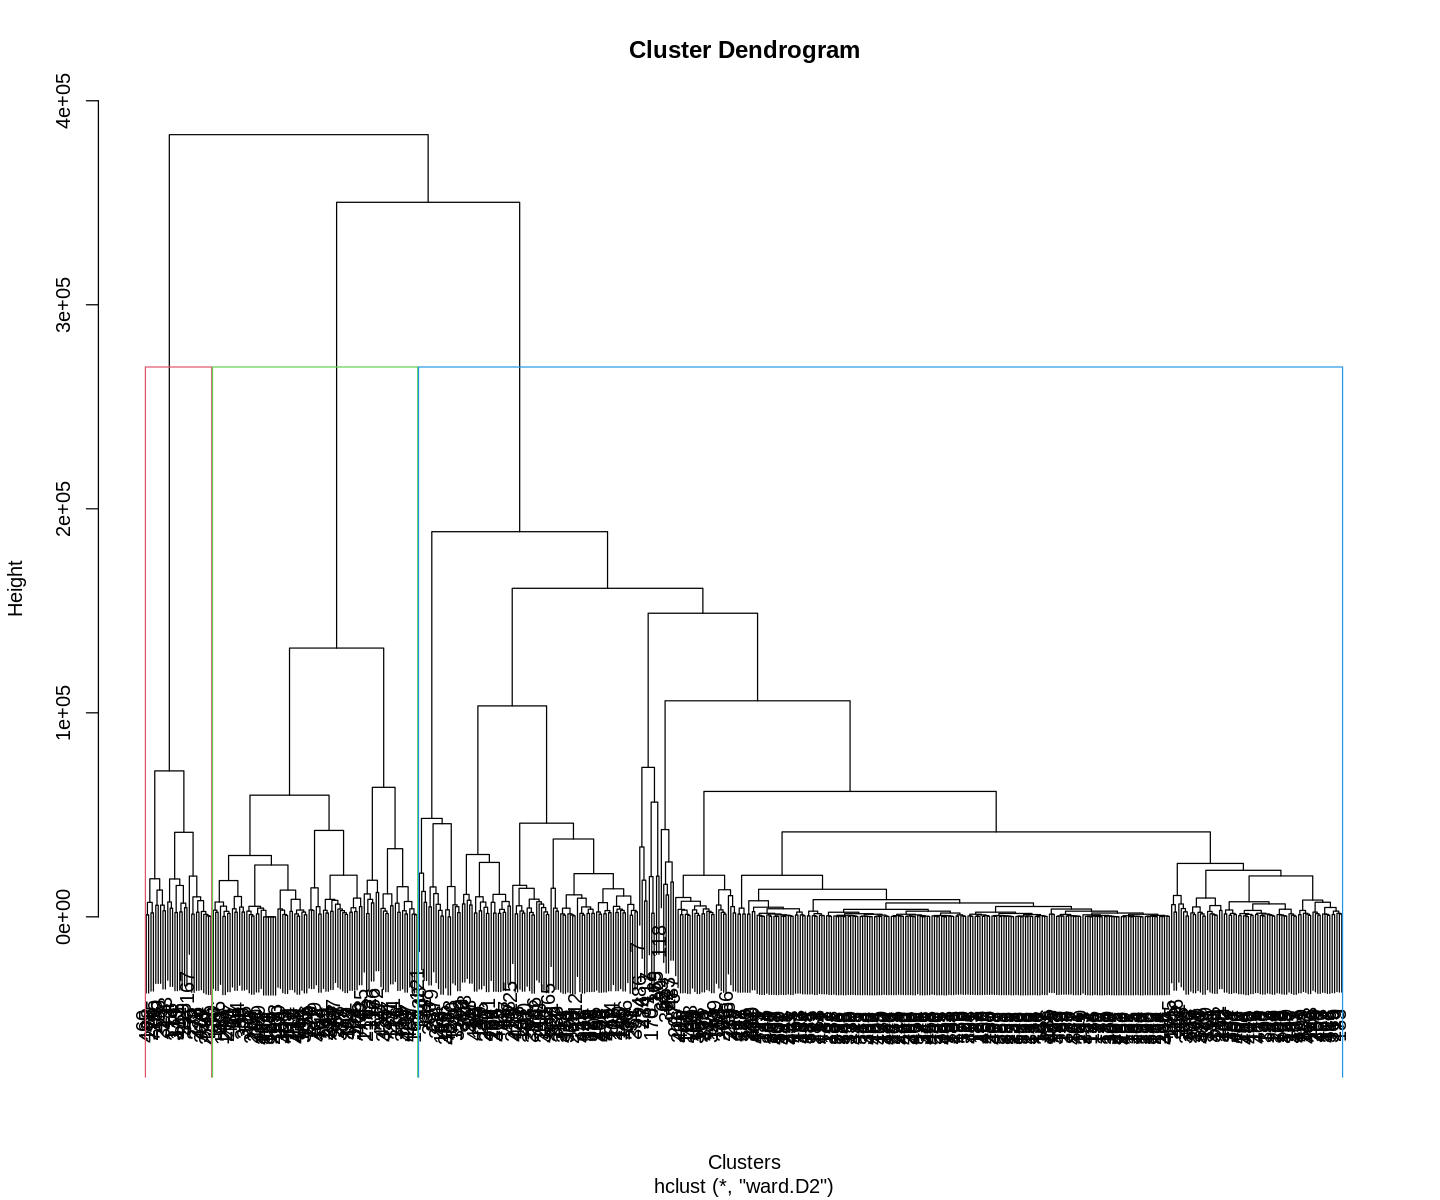

In [18]:
#@title
hc_acc_rf_x = hierachical_clustering_fn(ts_df, 'acc_rf_x')
hc_acc_rf_y = hierachical_clustering_fn(ts_df, 'acc_rf_y')
hc_acc_rf_z = hierachical_clustering_fn(ts_df, 'acc_rf_z')
fig(width = 12, heigth = 10)
hc_acc_rf = hierachical_clustering_fn(ts_df, col_names[1:3], plot_now = TRUE)

## Digital Encoding

In [19]:
#@title
digital_encoding_fn = function(hc_acc_rf_x, hc_acc_rf_y, hc_acc_rf_z, hc_acc_rf, sub_title = "" , start = 1, end = 500){
color_XYZ = c("X" = "red", "Y" = "green", "Z" = "blue")


state_acc_rf = data.frame(x = cutree(hc_acc_rf_x, 3),
                          y = cutree(hc_acc_rf_y, 3),
                          z = cutree(hc_acc_rf_z, 3),
                          hc27 = cutree(hc_acc_rf, 27),
                          hc10 = cutree(hc_acc_rf, 10))

# naturally combine the three digital code sequences from X, Y, Z
nc = apply(state_acc_rf, 1, function(x) paste(x[1], x[2], x[3], sep = ","))
state_acc_rf$nc = as.numeric(factor(nc, labels = 1:n_distinct(nc)))


# 3-state code sequence for X, Y, Z RF accelerator time series
p_st_x = ggplot(state_acc_rf, 
                aes(x = start:end, y = x, color = "X")) +
  geom_line() +
  scale_color_manual(values = color_XYZ) + 
  labs(x = "Time",
       y = "State",
       title = paste0(sub_title, " X-axis")) +
  theme_classic() +
  theme(legend.position = "none")

p_st_y = ggplot(state_acc_rf, 
                aes(x = start:end, y = y, color = "Y")) +
  geom_line() +
  scale_color_manual(values = color_XYZ) +
  labs(x = "Time",
       y = "State",
       title = paste0(sub_title, " Y-axis")) +
  theme_classic() +
  theme(legend.position = "none")

p_st_z = ggplot(state_acc_rf, 
                aes(x = start:end, y = z, color = "Z")) +
  geom_line() +
  scale_color_manual(values = color_XYZ) +
  labs(x = "Time",
       y = "State",
       title = paste0(sub_title, " Z-axis")) +
  theme_classic() +
  theme(legend.position = "none")

grid.arrange(p_st_x, p_st_y, p_st_z)

p_nc = ggplot(state_acc_rf, aes(x = start:end, y = nc)) +
  geom_line(color = "orange") +
  labs(x = "Time",
       y = "State",
       title = "Naturally-combinate (X,Y,Z)") +
  theme_classic()

# 27-state code sequence for the triplet time series
p_hc27 = ggplot(state_acc_rf, aes(x = start:end, y = hc27)) +
  geom_line(color = "darkgreen") +
  labs(x = "Time",
       y = "State",
       title = "Clustering-combinate (X,Y,Z), state: 27") +
  theme_classic() 

# 10-state code sequence for the triplet time series
p_hc10 = ggplot(state_acc_rf, aes(x = start:end, y = hc10)) +
  geom_line(color = "darkblue") +
  labs(x = "Time",
       y = "State",
       title = "Clustering-combinate (X,Y,Z), state: 10") +
  theme_classic()

grid.arrange(p_nc, p_hc27, p_hc10)

}

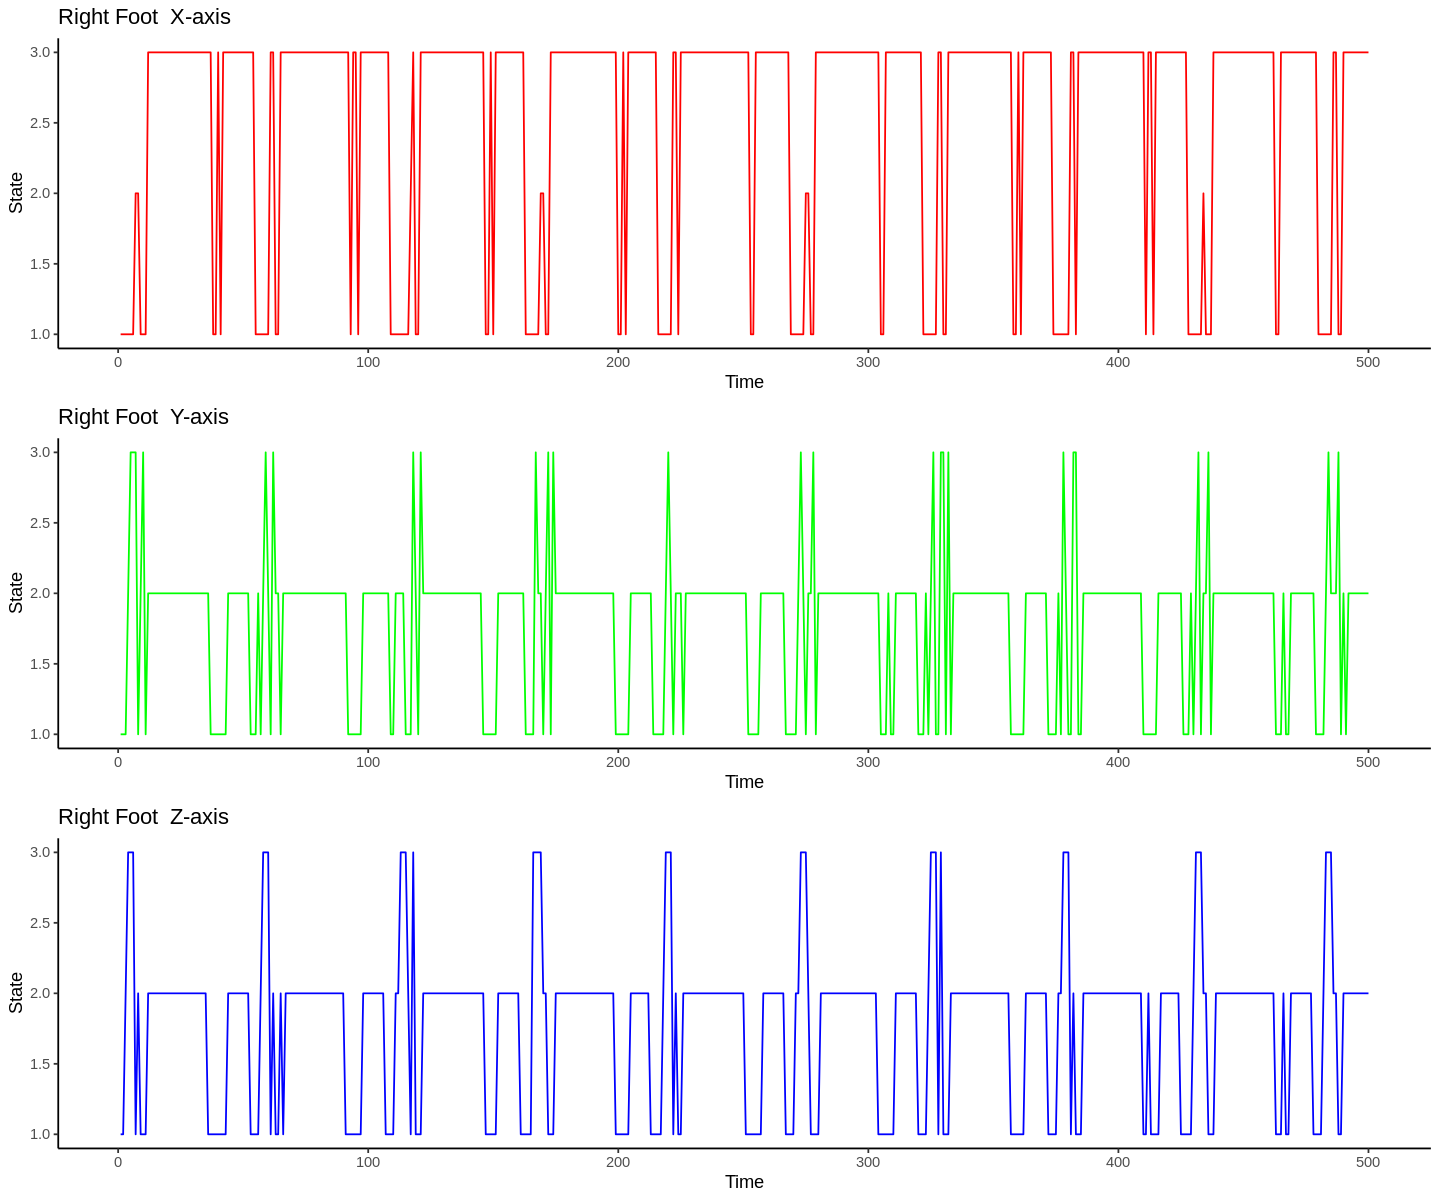

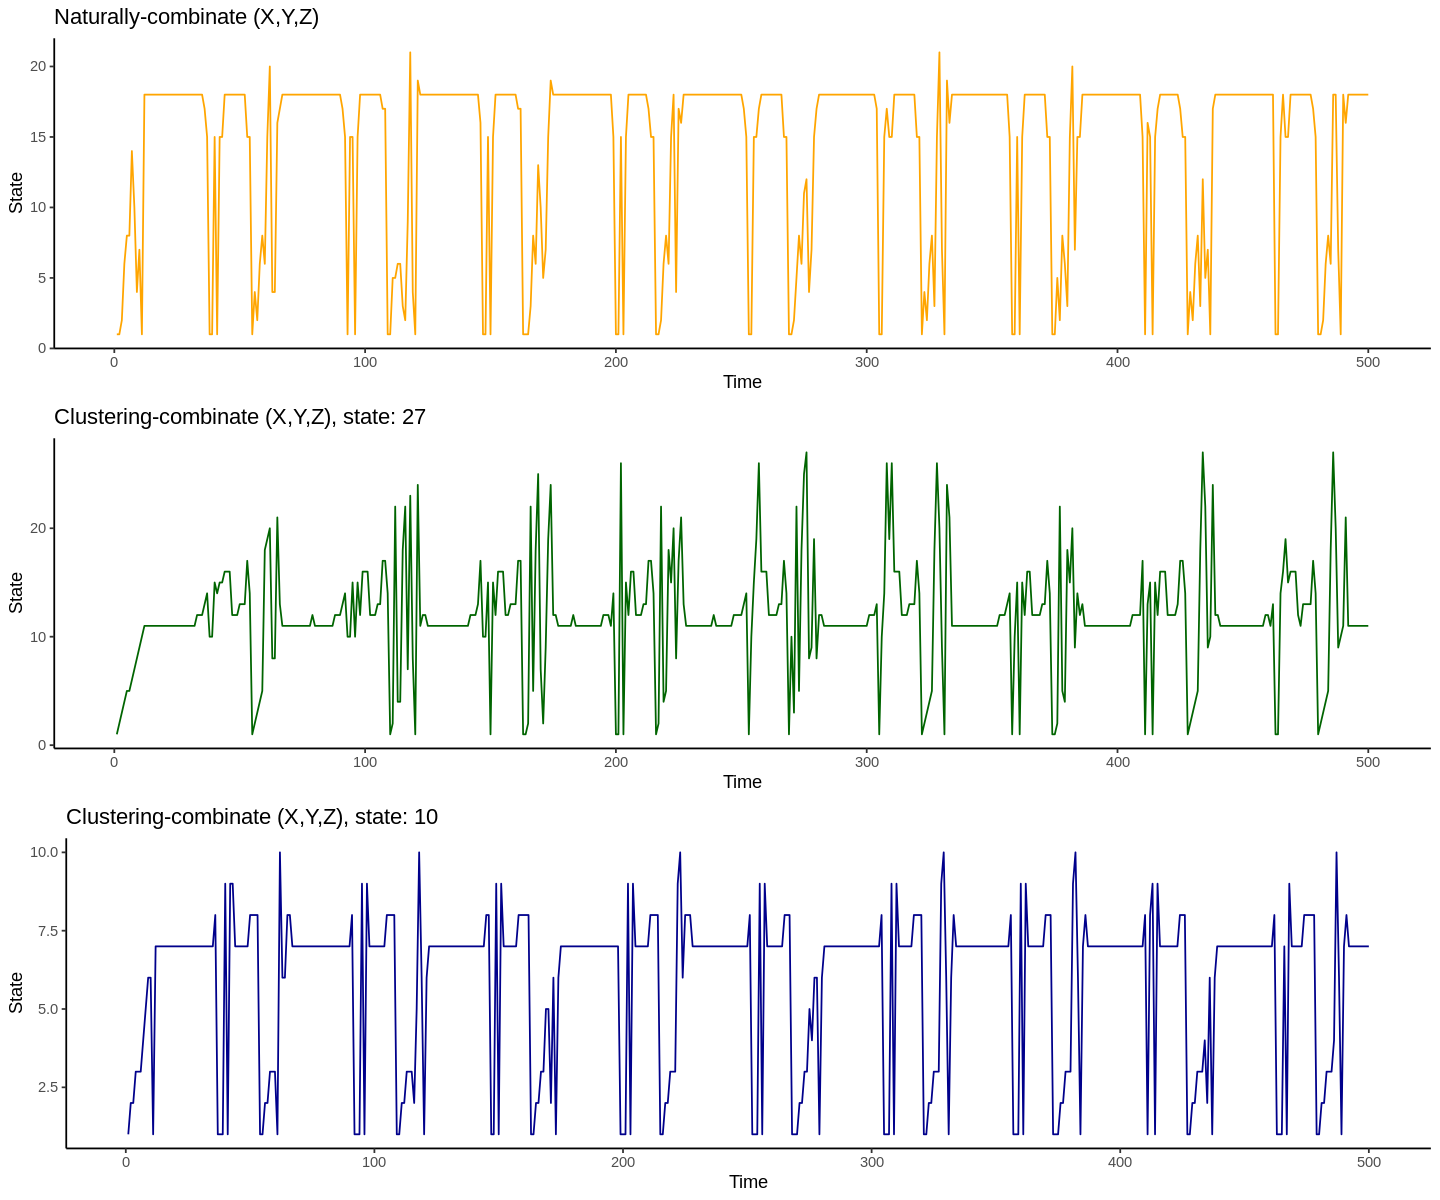

In [20]:
#@title
fig(width = 12, heigth = 10)
digital_encoding_fn(hc_acc_rf_x, hc_acc_rf_y, hc_acc_rf_z, hc_acc_rf, sub_title = "Right Foot " )

## **Empirircal Cumulative Distribution Function**

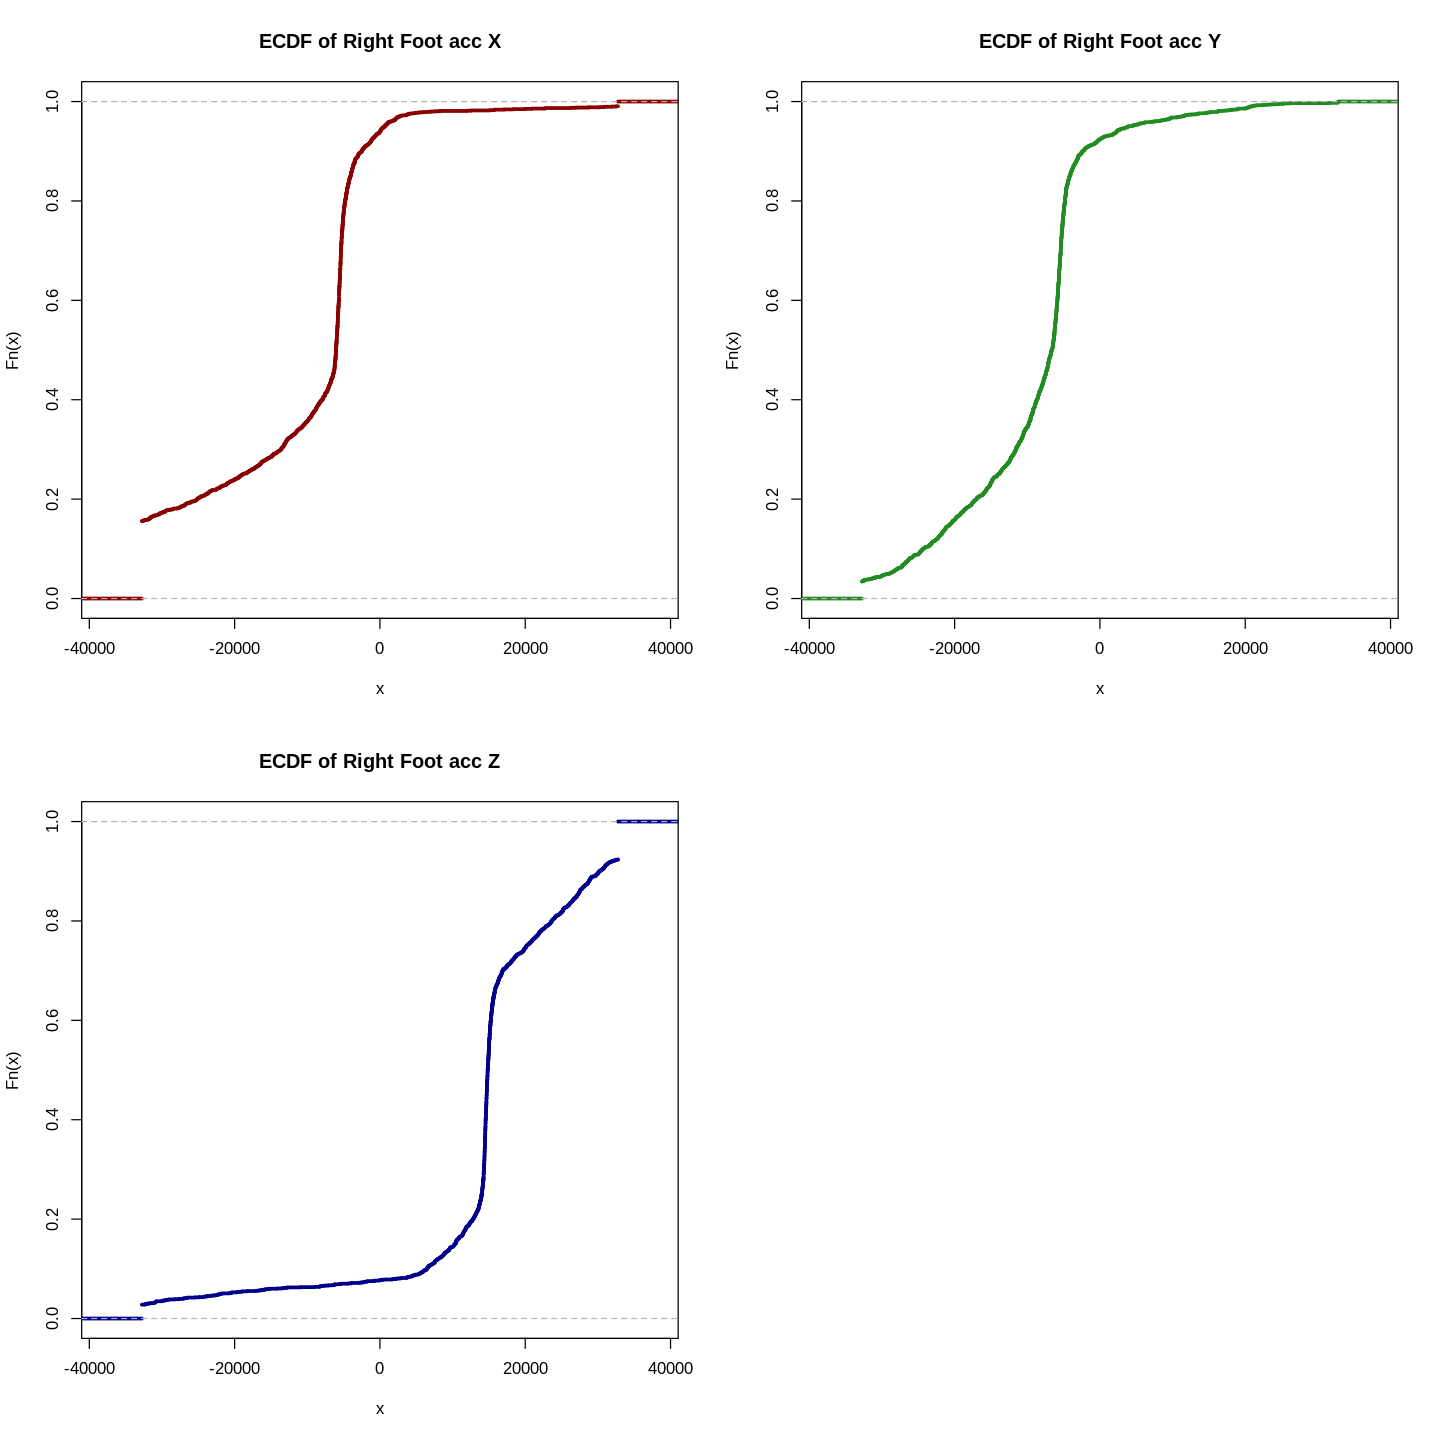

In [21]:
#@title
fig(width = 12, heigth = 12)
par(mfrow = c(2,2))
indv.data = ts_df$acc_rf_x
plot(ecdf(indv.data), col = "darkred", main = "ECDF of Right Foot acc X", lwd = 3)
indv.data = ts_df$acc_rf_y
plot(ecdf(indv.data), col = "forestgreen", main = "ECDF of Right Foot acc Y", lwd = 3)
indv.data = ts_df$acc_rf_z
plot(ecdf(indv.data), col = "blue4", main = "ECDF of Right Foot acc Z", lwd = 3)

## **Linear Approximation of Empirical CDF**

In [22]:
#@title
# LinApprox is a function used to plot the linearly approximated ecdf and output a list of relevant information
# Input: data - a numeric vector 
#        dc - digital-coding sequence got using data
#        (The two input argument should have the same length.)
#        PLOT - a logical value indicating whether the linearly approximated ecdf should be plotted
# Output: a linearly approximated ecdf and a list of relevant information
#         num.clst - number of clusters used
#         freq - frequency within each cluster
#         x.crd - x-coordinates of the segment endpoints
#         y.crd - y-coordinates of the segment endpoints
#         slope - slopes of the segments
#         Color - colors of the segments

LinApprox = function(data, dc, PLOT = T){
  if (length(data) != length(dc)){
    stop('Check! Two input arguments should have the same length!')
  }
  
  num.clst = n_distinct(dc)
  n = length(data)
  
  # find the x-coordinates
  x.crd = sapply(1:num.clst, function(x) range(data[which(dc == x)])) 
  clst.ord = order(x.crd[1,]) # order of cluster indices wrt. value size 
  x.crd = x.crd[,clst.ord]
  
  # find the y-coordinates
  freq = unname(table(dc)[clst.ord]) 
  y.crd = c(0, cumsum(freq)/n) 
  
  slope = sapply(1:num.clst, function(i) freq[i]/(x.crd[2,i] - x.crd[1,i]))
  
  # plot the linearly approximated ecdf
  if (PLOT == T){
    Color = rainbow(num.clst)
    plot(ecdf(indv.data), col = 'lemonchiffon4', main = "ECDF of RF acc X", lwd = 3)
    for (i in 1:num.clst) 
      segments(x.crd[1,i], y.crd[i], x.crd[2,i], y.crd[i+1], col = Color[i])
  }
  
  return(list(num.clst = num.clst,
              freq = freq,
              x.crd = x.crd,
              y.crd = y.crd,
              slope = slope,
              Color = Color))
}

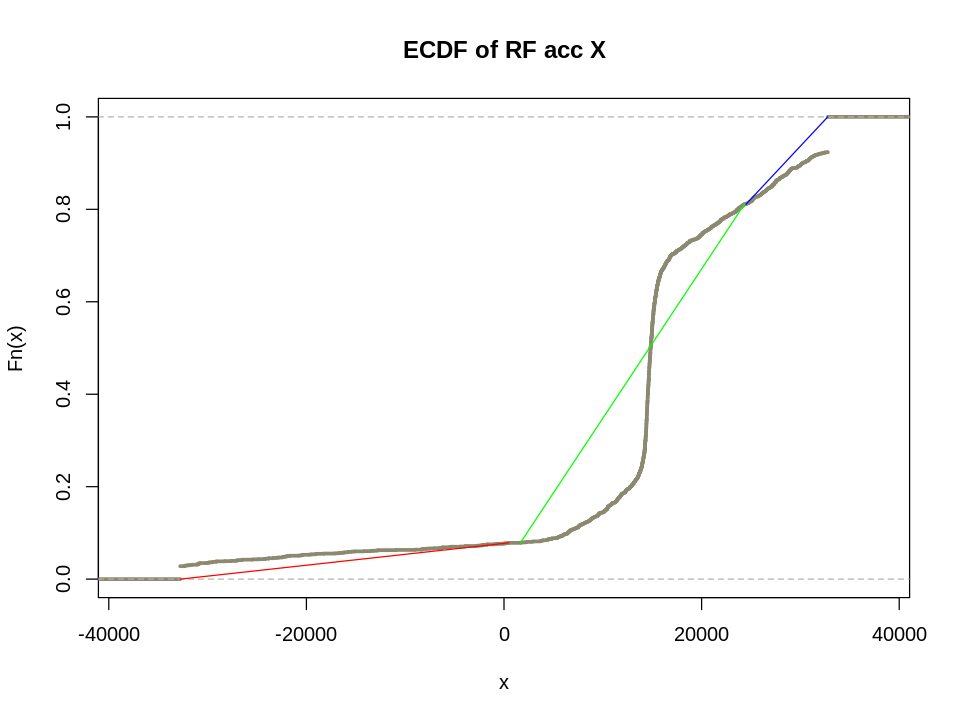

In [23]:
#@title
fig(width = 8, heigth = 6)
hc = hclust(dist(indv.data), method = "ward.D2")

# linear approximation of ecdf using 3 clusters
lin.approx0 = LinApprox(indv.data, cutree(hc, 3))

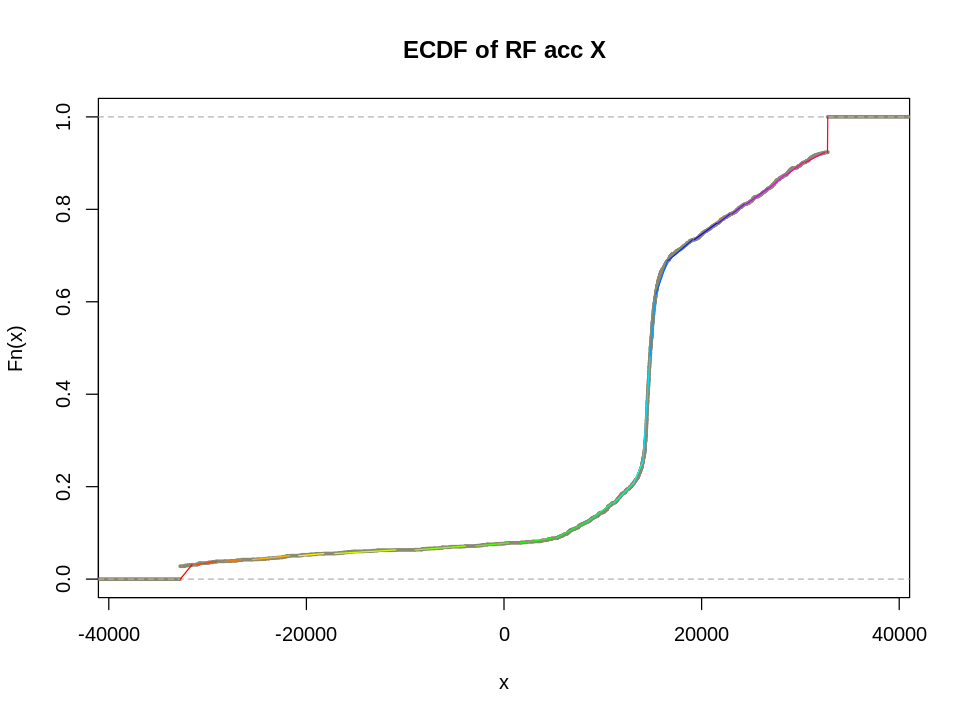

In [24]:
#@title
num.clst = 25
lin.approx1 = LinApprox(indv.data, cutree(hc, num.clst))

## **Entropy**

In [25]:
#@title
# Entropy is a function used to calculate the entropy
# Input: x - a numeric vector of proportions
# Output: entropy of x

Entropy = function(x){
  entropy = -sum(x*log(x), na.rm = T)
  return(entropy)
}

# DirAssoc is a function used to calculate the directional association
# Input: dc1, dc2 - two digital-coding sequences of the same length
#        dc1 is obtained using feature V1
#        dc2 is obtained using feature V2
# Output: directional association from V2 to V1

DirAssoc =  function(dc1, dc2){
  if (length(dc1) != length(dc2)){
    stop('Check! Two digital-coding sequences should have the same length!')
  }
  
  n = length(dc1) # sample size
  cont.table = table(dc1, dc2) # contingency table
  
  cond.prop = proportions(cont.table, margin = 2) # conditional row proportions given column category
  cond.entropy = apply(cond.prop, 2, Entropy) # conditional entropy given column category
  
  marg.prop = table(dc1) / n # marginal row proportions
  marg.entropy = Entropy(marg.prop) # marginal entropy
  
  rescaled.entropy = cond.entropy / marg.entropy 
  
  weight = table(dc2) / n # marginal column proportions used as weights
  dir.assoc = sum(weight * rescaled.entropy)
  
  return(dir.assoc)
}

MCE = function(dc1, dc2){
  MCE = (DirAssoc(dc1, dc2) + DirAssoc(dc2, dc1)) / 2
  return(MCE)
}

# MCEMatrix is a function used to calculate mutual conditional entropy matrix 
# Input: k - number of features V1, V2, ..., Vk
#        dc.list - list of k digital-coding sequences
# Output: k*k mutual conditional entropy matrix

MCEMatrix = function(k, dc.list){
  entropy.matrix = matrix(0, k, k)
  
  for (i in 1:k){
    for (j in 1:k){
      dc1 = dc.list[[i]]
      dc2 = dc.list[[j]]
      entropy.matrix[i,j] = MCE(dc1, dc2)
    }
  }
  
  colnames(entropy.matrix) = rownames(entropy.matrix) = names(dc.list)
  return(entropy.matrix)
}

In [ ]:
#@title
dc1 = cutree(hclust(dist(ts_df[,1:3]), method = "ward.D2"), 10)
dc2 = cutree(hclust(dist(ts_df[,4:6]), method = "ward.D2"), 10)
dc3 = cutree(hclust(dist(ts_df[,7:9]), method = "ward.D2"), 10)
dc4 = cutree(hclust(dist(ts_df[,10:12]), method = "ward.D2"), 10)
dc5 = cutree(hclust(dist(ts_df[,13:15]), method = "ward.D2"), 10)
dc6 = cutree(hclust(dist(ts_df[,16:18]), method = "ward.D2"), 10)

dc.list = list(acc_rf = dc1, 
               gyro_rf = dc2, 
               acc_rs = dc3, 
               gyro_rs = dc4,
               acc_rt = dc5, 
               gyro_rt = dc6)

entropy.matrix = MCEMatrix(6, dc.list)


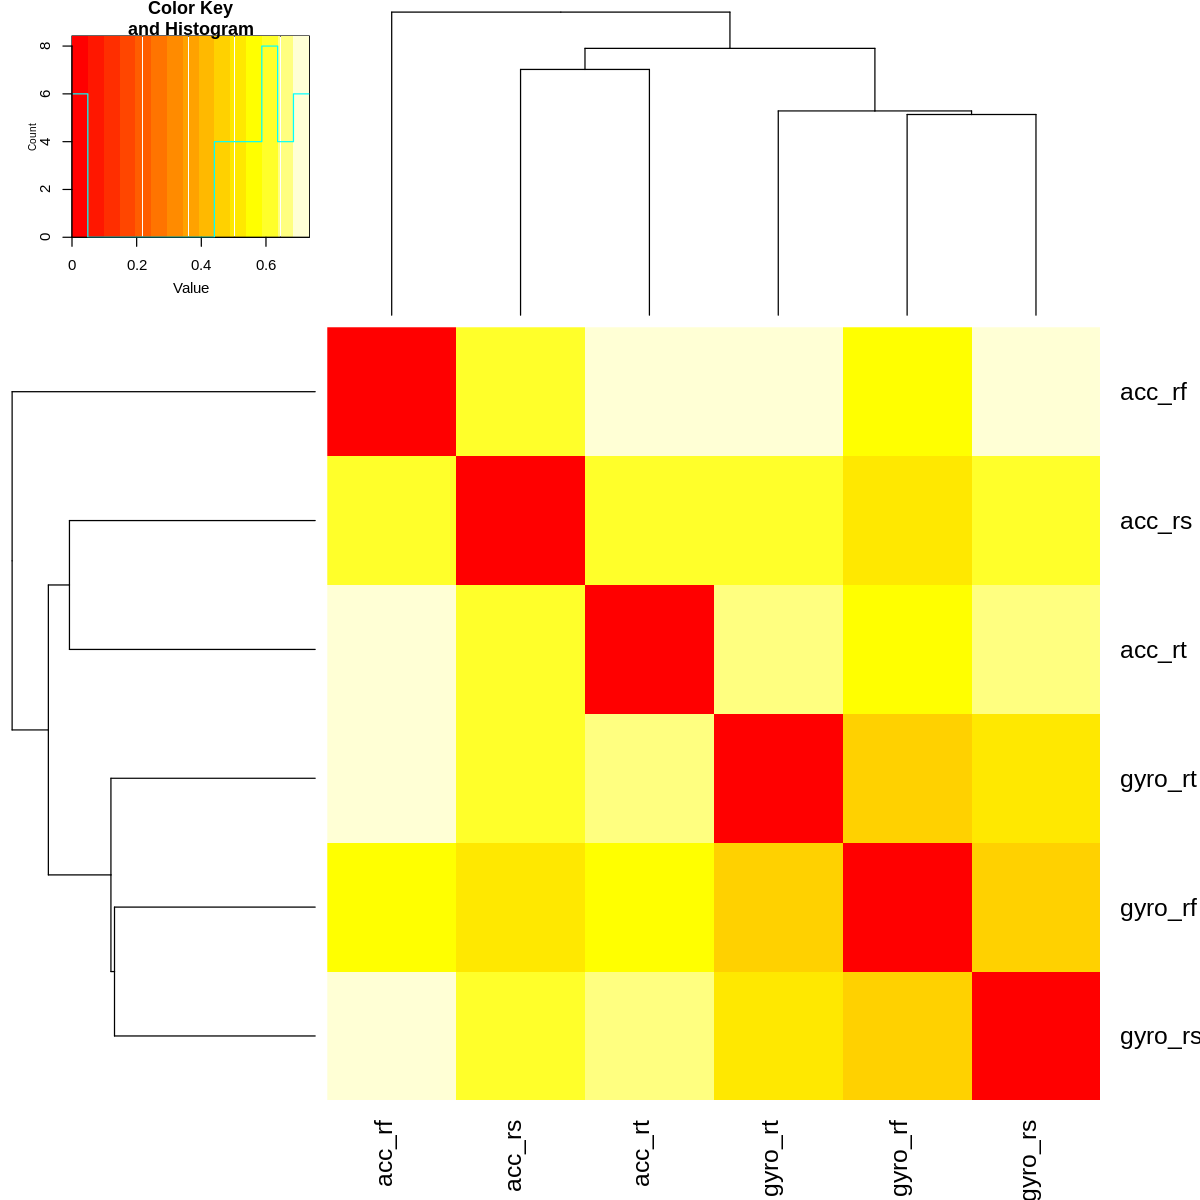

In [27]:
#@title

fig(width = 10, heigth = 10)
heatmap.2(entropy.matrix, symm = T, trace = "none", key = T, revC = T)


## **Landmark**

In [28]:
#@title
# Landmark is a function used to find the landmark of the code sequence and the start time point of each cycle.
# Input: dc - a digital-coding sequence
#        w - weight for the variance of recurrence time
# Output: landmark - the code used as the landmark
#         cycle.start - the starting time point of each cycle based on the landmark

Landmark = function(dc, w = 0.5){
  codes = unique(dc)
  
  landmark = 0
  sum.var = 10^8
  cycle.start = c()
  
  for (i in codes){
    tf.dc = ifelse(dc == i, 1, 0)  # transform dc to a 0-1 coded sequence
    tf.rle = rle(tf.dc) 
    
    size = tf.rle$lengths[tf.rle$values == 1]  # size of Run_i
    
    run.start = cumsum(c(1, tf.rle$lengths))[tf.rle$values == 1]  # starting time point of Run_i
    recur.time = diff(run.start)  # recurrence time of Run_i
    run.start = run.start[run.start <= length(dc)]
    
    if (length(size) == 1 | length(recur.time) == 1)
      sum.var.temp = 10^8
    else
      sum.var.temp = (1 - w) * var(size) + w * var(recur.time)
    
    if (sum.var > sum.var.temp){
      sum.var = sum.var.temp
      landmark = i
      cycle.start = run.start
    }
  }
  
  return(list(landmark = landmark,
              cycle.start = cycle.start))
}

In [29]:
#@title
n = nrow(ts_df)

data_acc_rf = ts_df[,1:3]
names(data_acc_rf) = letters[24:26]
data_acc_lf = ts_df[,19:21]
names(data_acc_lf) = letters[24:26]
mrg.data_acc_lrf = rbind(data_acc_lf, data_acc_rf)

hc_acc_lrf = hclust(dist(mrg.data_acc_lrf), method = "ward.D2")
dc_acc_lrf = cutree(hc_acc_lrf, 10)
dc_acc_lf = dc_acc_lrf[1:n]
dc_acc_rf = dc_acc_lrf[(n+1):(2*n)]
nc.dc_acc_lrf = mapply(function(x,y) paste(x, y, sep = ","), dc_acc_lf, dc_acc_rf)


In [30]:
#@title
ts_df$dc_acc_lf = as.factor(dc_acc_lf)
ts_df$dc_acc_rf = as.factor(dc_acc_rf)

color_scheme = c("1" = "#9E0142",
                 "2" = "#D53E4F",
                 "3" = "#F46D43",
                 "4" = "#FDAE61",
                 "5" = "#FEE08B",
                 "6" = "#E6F598",
                 "7" = "#ABDDA4",
                 "8" = "#66C2A5",
                 "9" = "#3288BD",
                 "10" = "#5E4FA2",
                 "X" = "red", 
                 "Y" = "green", 
                 "Z" = "blue",
                 "Landmark" = "black")

# choose a chunk of the time series data
start = 1
end = 300
sampledata = ts_df[start:end,] 

cycle.start = Landmark(nc.dc_acc_lrf)$cycle.start
sample.cycle.start = cycle.start[cycle.start >= start & cycle.start <= end]

# plot the right foot accelerator data with color coding
p_acc_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_vline(aes(xintercept = seq(start, end), color = dc_acc_rf), 
             linetype = "dotted", size = 0.75) +          
  geom_line(aes(y = acc_rf_x, color = "X")) +
  geom_line(aes(y = acc_rf_y, color = "Y")) +
  geom_line(aes(y = acc_rf_z, color = "Z")) +
  geom_vline(xintercept = sample.cycle.start, size = 1) + 
  scale_color_manual("RF acc", values = color_scheme) +
  labs(x = "Time",
       y = "Signal",
       title = "Right Foot accelerator") +
  theme_bw() +
  theme(legend.key.height = unit(0.5, 'cm'))

# plot the left foot accelerator data with color coding
p_acc_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_vline(aes(xintercept = seq(start, end), color = dc_acc_lf), 
             linetype = "dotted", size = 0.75) +              
  geom_line(aes(y = acc_lf_x, color = "X")) +
  geom_line(aes(y = acc_lf_y, color = "Y")) +
  geom_line(aes(y = acc_lf_z, color = "Z")) +
  geom_vline(xintercept = sample.cycle.start, size = 1) +
  scale_color_manual("LF acc", values = color_scheme) +
  labs(x = "Time",
       y = "Signal",
       title = "Left Foot accelerator") +
  theme_bw() +
  theme(legend.key.height = unit(0.5, 'cm'))


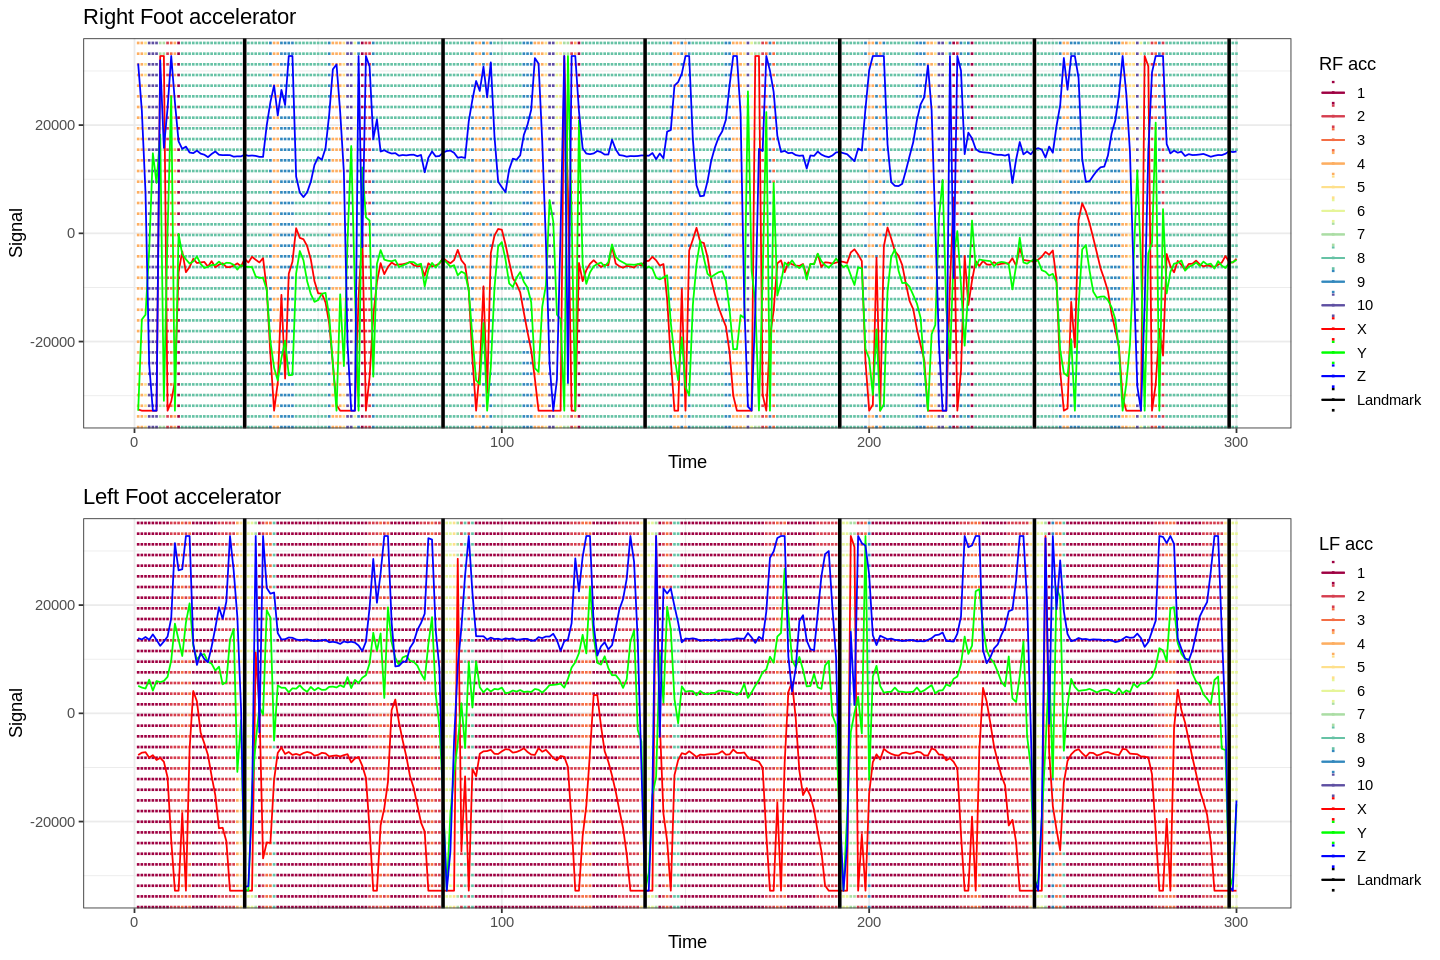

In [32]:
#@title
fig(width = 12, heigth = 8)
run_count = 0
if (run_count == 0){
p_acc_lf_lm = p_acc_lf
p_acc_rf_lm = p_acc_rf 
run_count = run_count + 1
}

grid.arrange(p_acc_rf_lm, p_acc_lf_lm, ncol = 1)

Warning message in geom2trace.default(dots[[1L]][[1L]], dots[[2L]][[1L]], dots[[3L]][[1L]]):
“geom_GeomCurve() has yet to be implemented in plotly.
  If you'd like to see this geom implemented,
  Please open an issue with your example code at
  https://github.com/ropensci/plotly/issues”


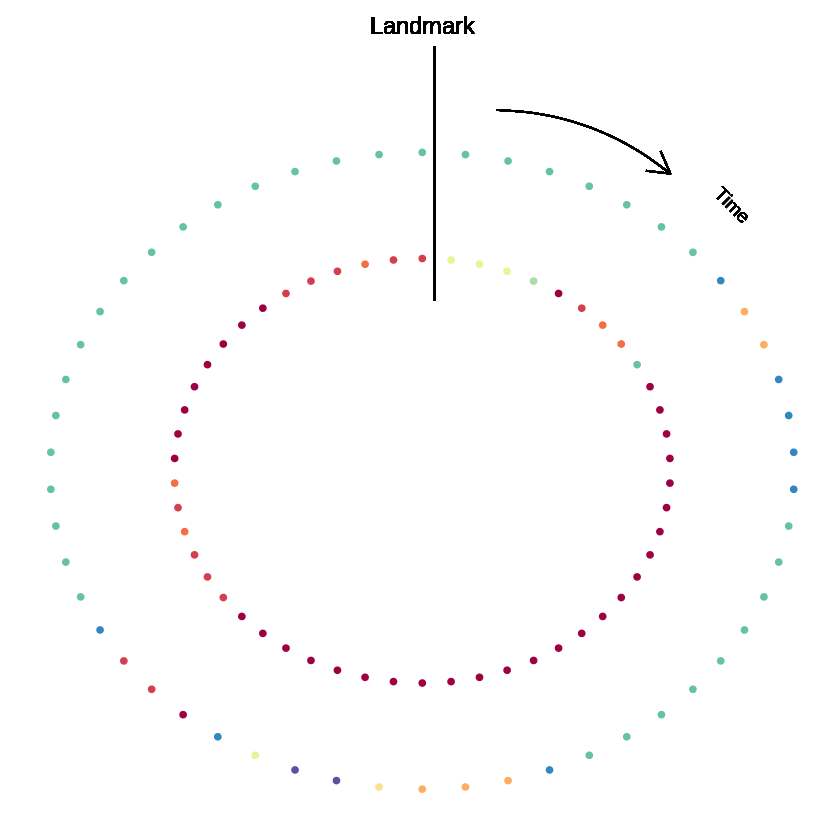

In [33]:
#@title
start = cycle.start[1]
end = cycle.start[2] - 1
cycle.length = diff(cycle.start)[1]

# create a data frame saving the 2-dim coordinates of points and corresponding states
conc.cir = data.frame(
  x_lf = sin(1:cycle.length * 2 * pi /cycle.length),
  y_lf = cos(1:cycle.length * 2 * pi /cycle.length),
  x_rf = sin(1:cycle.length * 2 * pi /cycle.length) * 1.5,
  y_rf = cos(1:cycle.length * 2 * pi /cycle.length) * 1.5,
  dc_lf = as.factor(dc_acc_lf[start:end]),
  dc_rf = as.factor(dc_acc_rf[start:end]))

# graphically display the 1st gait cycle with concentric circles
p1 <- ggplot(conc.cir) +
  geom_point(aes(x = x_lf, y = y_lf, color = dc_lf)) +
  geom_point(aes(x = x_rf, y = y_rf, color = dc_rf)) +
  geom_segment(aes(x = 0.05, y = 0.8, xend = 0.05, yend = 2)) +
  geom_text(x = 0, y = 2.1, label = "Landmark", size = 5) +
  geom_curve(x = 0.3, y = 1.7, xend = 1, yend = 1.4, curvature = -0.175,
             arrow = arrow(length = unit(0.03, "npc"))) +
  geom_text(x = 1.25, y = 1.25, label = "Time", size = 4, angle = -45) +
  scale_color_manual(values = color_scheme) +
  theme_minimal() +
  theme(legend.position = "none",
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())
fig(width = 7, heigth = 7)
p1
p1 <- ggplotly(p1)

htmlwidgets::saveWidget(p1, "p1.html")

In [34]:
#@title
start = cycle.start[1]
end = last(cycle.start) - 1

x_lf = c()
x_rf = c()
y_lf = c()
y_rf = c()
z = c()
num.cycle = length(cycle.start) - 1

# create a data frame saving the 3-dim coordinates of points and corresponding states
for(i in 1:num.cycle){
  cycle.length = diff(cycle.start)[i]
  degree = 1:cycle.length * 2 * pi /cycle.length
  x_lf = c(x_lf, sin(degree))
  x_rf = c(x_rf, sin(degree) * 1.5)
  y_lf = c(y_lf, cos(degree))
  y_rf = c(y_rf, cos(degree) * 1.5)
  z = c(z, rep(i, cycle.length))
}

cylinder = data.frame(X = c(x_lf, x_rf),
                      Y = c(y_lf, y_rf),
                      Z = rep(z, 2))  

cylinder$state = c(dc_acc_lf[start:end], dc_acc_rf[start:end])
cylinder$state = as.factor(cylinder$state)

# graphically display all the gait cycles with concentric cylinders
p2 <- plot_ly(cylinder, 
        x = ~ X,
        y = ~ Y,
        z = ~ Z,
        color = ~ state,
        type = "scatter3d",
        mode = "markers",
        size = 0.5,
        colors = color_scheme)

In [35]:
#@title
htmlwidgets::saveWidget(p2, "p2.html")